In [1]:
# used to convert the varnamala image to csv
import cv2
import numpy as np
import pandas as pd
import os

def preprocess_images(image_folder):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                
                inverted_image = cv2.bitwise_not(image)

              
                _, thresholded_image = cv2.threshold(inverted_image, 127, 255, cv2.THRESH_BINARY)

                
                resized_image = cv2.resize(thresholded_image, (35, 35))

            
                flattened_image = resized_image.flatten()

            
                images.append(flattened_image)

               
                labels.append(filename)

    return np.array(images), np.array(labels)

image_folder = r'A:\mnist_dataset\importnant_combined\a_tulu_data'  
images, labels = preprocess_images(image_folder)

df_images = pd.DataFrame(images)
df_labels = pd.DataFrame(labels, columns=["Label"])


df = pd.concat([df_labels, df_images], axis=1)


df.to_csv("tulu_data.csv", index=False)


In [2]:
# to remove the png from the label[1.png to 1]
import pandas as pd

# Load the CSV file
csv_file_path = r'tulu_data.csv'
df = pd.read_csv(csv_file_path)
df['Label'] = df['Label'].str.replace('.png', '')

# Save the modified DataFrame back to a CSV file
df.to_csv('tulu_data_imp.csv', index=False)

shape: (699, 1226)
Pixel data saved to pixel_data.txt
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


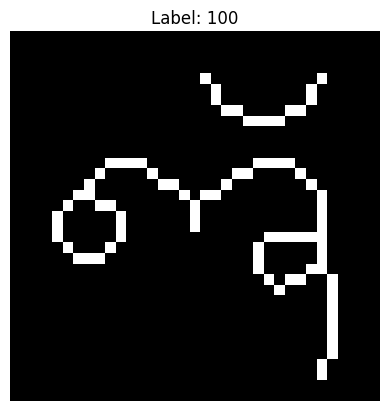

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'A:\mnist_dataset\importnant_combined\tulu_data_imp.csv')
print("shape:",df.shape)
labels = df.iloc[:, 0] 
pixels = df.iloc[:, 1:]  


def process_image(index):
    image = pixels.iloc[index].values.reshape(35,35)
    print(image)  
    
  
    plt.imshow(image, cmap='gray')  
    plt.title(f"Label: {labels.iloc[index]}") 
    plt.axis('off')
    plt.show()  
    import numpy as np

 # Save pixel data to file

print("Pixel data saved to pixel_data.txt")
process_image(2)

